# Implementation of the Generative Adversarial Network (GAN)
**Step 1: Import Necessary Libraries**

In [9]:
import tensorflow as tf
from tensorflow.keras import layers, models, losses, optimizers
import numpy as np

**Step 2: Define the Generator and Discriminator Networks**


In [10]:
def build_generator(latent_dim):
    model = models.Sequential()
    model.add(layers.Dense(128, activation='relu', input_dim=latent_dim))
    model.add(layers.Dense(784, activation='sigmoid'))  # Output layer, representing MNIST image size
    model.add(layers.Reshape((28, 28, 1)))
    return model

def build_discriminator():
    model = models.Sequential()
    model.add(layers.Flatten(input_shape=(28, 28, 1)))
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))  # Output layer, binary classification
    return model

**Step 3: Define the GAN**

In [11]:
def build_gan(generator, discriminator):
    discriminator.compile(loss='binary_crossentropy', optimizer=optimizers.Adam(), metrics=['accuracy'])
    discriminator.trainable = False  # Freeze discriminator weights during GAN training

    gan = models.Sequential()
    gan.add(generator)
    gan.add(discriminator)
    gan.compile(loss='binary_crossentropy', optimizer=optimizers.Adam())
    return gan

**Step 4: Prepare Data**

In [12]:
(x_train, _), (_, _) = tf.keras.datasets.mnist.load_data()
x_train = x_train.astype('float32') / 255.0
x_train = np.expand_dims(x_train, axis=-1)

**Step 5: Training Loop**

In [13]:
def train_gan(generator, discriminator, gan, latent_dim, epochs, batch_size, x_train):
    for epoch in range(epochs):
        # Generate random noise as input to the generator
        noise = np.random.normal(0, 1, (batch_size, latent_dim))

        # Generate fake images with the generator
        fake_images = generator.predict(noise)

        # Combine real and fake images into one array
        real_images = x_train[np.random.randint(0, x_train.shape[0], batch_size)]
        combined_images = np.concatenate([real_images, fake_images])

        # Labels for generated and real data
        labels = np.concatenate([np.ones((batch_size, 1)), np.zeros((batch_size, 1))])
        labels += 0.05 * np.random.random(labels.shape)  # Add noise to labels

        # Train the discriminator
        d_loss = discriminator.train_on_batch(combined_images, labels)

        # Generate new noise
        noise = np.random.normal(0, 1, (batch_size, latent_dim))

        # Labels for generated data
        misleading_targets = np.zeros((batch_size, 1))

        # Train the generator via the discriminator's error
        g_loss = gan.train_on_batch(noise, misleading_targets)

        # Print progress
        print(f"Epoch {epoch}/{epochs}, D Loss: {d_loss[0]}, G Loss: {g_loss}")

**Step 6: Run the Training**

In [14]:
latent_dim = 100  # Dimensionality of the latent space
generator = build_generator(latent_dim)
discriminator = build_discriminator()
gan = build_gan(generator, discriminator)
train_gan(generator, discriminator, gan, latent_dim, epochs=100, batch_size=128, x_train=x_train)

4/4 [==============================] - 0s 3ms/step
Epoch 0/100, D Loss: 0.8039126396179199, G Loss: 0.20571249723434448
4/4 [==============================] - 0s 3ms/step
Epoch 1/100, D Loss: 0.3843733072280884, G Loss: 0.058032527565956116
4/4 [==============================] - 0s 3ms/step
Epoch 2/100, D Loss: 0.31898611783981323, G Loss: 0.028936075046658516
4/4 [==============================] - 0s 3ms/step
Epoch 3/100, D Loss: 0.28042274713516235, G Loss: 0.021634839475154877
4/4 [==============================] - 0s 3ms/step
Epoch 4/100, D Loss: 0.21414542198181152, G Loss: 0.028040066361427307
4/4 [==============================] - 0s 3ms/step
Epoch 5/100, D Loss: 0.15669462084770203, G Loss: 0.041004303842782974
4/4 [==============================] - 0s 3ms/step
Epoch 6/100, D Loss: 0.1190696507692337, G Loss: 0.05056784301996231
4/4 [==============================] - 0s 3ms/step
Epoch 7/100, D Loss: 0.08729676902294159, G Loss: 0.05424071475863457
4/4 [=========================

**Step 7: Results**

1/1 [==============================] - 0s 45ms/step


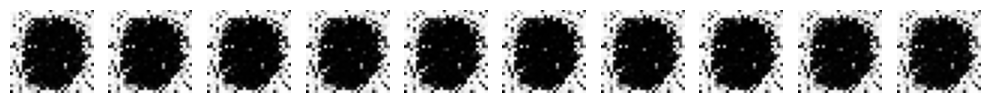

In [16]:
import matplotlib.pyplot as plt

def plot_generated_images(generator, latent_dim, num_examples=10, figsize=(10, 10)):
    noise = np.random.normal(0, 1, (num_examples, latent_dim))
    generated_images = generator.predict(noise)

    plt.figure(figsize=figsize)
    for i in range(num_examples):
        plt.subplot(1, num_examples, i+1)
        plt.imshow(generated_images[i, :, :, 0], cmap='gray')
        plt.axis('off')
    plt.tight_layout()
    plt.show()


plot_generated_images(generator, latent_dim)